In [529]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [77]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('contest_train.csv', sep=',')
df.dropna(axis=1, how='any', inplace=True)


In [151]:
df['targetBin'] = df["TARGET"].apply(lambda x: 0 if x in [0, 1] else 2).values

In [152]:
myTrain = df.iloc[:15000, :]
myTest  = df.iloc[15000:, :]

myTrain.to_csv('mytrain.csv', sep=',', index=False)
myTest.to_csv('mytest.csv', sep=',', index=False)

In [153]:
frame = [df.groupby('TARGET').mean(), df.groupby('TARGET').median(), df.groupby('TARGET').sum(), df.groupby('TARGET').std()]
result = pd.concat(frame, keys=['mean', 'median', 'sum', 'std'])
result

ID     FEATURE_0     FEATURE_1   FEATURE_2  \
       TARGET                                                         
mean   0       1.358740e+09      5.813263      1.367104    0.061632   
       1       1.395943e+09      5.372905      1.357564    0.054756   
       2       1.834756e+09      2.129893      0.825623    0.015125   
median 0       7.365401e+08      1.000000      1.000000    0.000000   
       1       7.445125e+08      1.000000      1.000000    0.000000   
       2       1.037245e+09      0.000000      0.000000    0.000000   
sum    0       1.770302e+13  75741.000000  17812.000000  803.000000   
       1       5.914612e+12  22765.000000   5752.000000  232.000000   
       2       2.062266e+12   2394.000000    928.000000   17.000000   
std    0       1.965580e+09     16.054976      1.852795    0.240495   
       1       1.922808e+09     13.031838      1.776944    0.227530   
       2       2.433485e+09      6.278561      1.371320    0.122103   

               FEATURE_3    FEATURE_4  FEATURE_5   FEATURE_6     FEATURE_7  \
       TARGET                                                                
mean   0             0.0     0.147440   0.000230    0.011666  8.849868e+01   
       1             0.0     0.142790   0.000236    0.012273  7.171292e+01   
       2             0.0     0.090747   0.000000    0.012456  4.019410e+01   
median 0             0.0     0.000000   0.000000    0.000000  4.131582e+00   
       1             0.0     0.000000   0.000000    0.000000  3.706545e+00   
       2             0.0     0.000000   0.000000    0.000000  1.193728e+00   
sum    0             0.0  1921.000000   3.000000  152.000000  1.153049e+06   
       1             0.0   605.000000   1.000000   52.000000  3.038476e+05   
       2             0.0   102.000000   0.000000   14.000000  4.517817e+04   
std    0             0.0     0.354558   0.015173    0.107383  2.690805e+02   
       1             0.0     0.349900   0.015363    0.110114  2.309559e+02   
       2             0.0     0.287377   0.000000    0.110956  1.703892e+02   

                 FEATURE_9   FEATURE_10   FEATURE_11    FEATURE_13  \
       TARGET                                                        
mean   0          0.410085     0.258884     0.213447      5.712257   
       1          0.380222     0.241208     0.207222      4.721737   
       2          0.210854     0.134342     0.115658      2.838078   
median 0          0.000000     0.000000     0.000000      2.000000   
       1          0.000000     0.000000     0.000000      2.000000   
       2          0.000000     0.000000     0.000000      1.000000   
sum    0       5343.000000  3373.000000  2781.000000  74425.000000   
       1       1611.000000  1022.000000   878.000000  20006.000000   
       2        237.000000   151.000000   130.000000   3190.000000   
std    0          0.895521     0.556577     0.409756     18.850189   
       1          0.860208     0.525435     0.405364     14.680730   
       2          0.649013     0.398924     0.319957      6.294390   

                 FEATURE_14   FEATURE_15   FEATURE_16   FEATURE_17  \
       TARGET                                                        
mean   0           2.217438     0.129634     0.124645     0.133164   
       1           2.284871     0.134293     0.136653     0.140194   
       2           1.749110     0.067616     0.064057     0.057829   
median 0           2.000000     0.000000     0.000000     0.000000   
       1           2.000000     0.000000     0.000000     0.000000   
       2           1.000000     0.000000     0.000000     0.000000   
sum    0       28891.000000  1689.000000  1624.000000  1735.000000   
       1        9681.000000   569.000000   579.000000   594.000000   
       2        1966.000000    76.000000    72.000000    65.000000   
std    0           2.338505     0.335913     0.330329     0.339765   
       1           2.264975     0.341007     0.343522     0.347229   
       2           1.990460     0.251197     0

In [536]:
f1 = [
 [0.0338, 'FEATURE_80'],
 [0.0293, 'FEATURE_81'],
 [0.0283, 'FEATURE_238'],
 [0.0219, 'FEATURE_121'],
 [0.0213, 'FEATURE_122'],
 [0.0205, 'FEATURE_113'],
 [0.0193, 'FEATURE_76'],
 [0.0184, 'FEATURE_69'],
 [0.0173, 'FEATURE_112'],
 [0.0161, 'FEATURE_62'],
 [0.0152, 'FEATURE_252'],
 [0.0151, 'FEATURE_74'],
 [0.0135, 'FEATURE_239'],
 [0.0134, 'FEATURE_147'],
 [0.012, 'FEATURE_253'],
 [0.0119, 'FEATURE_170'],
 [0.011, 'FEATURE_65'],
 [0.0109, 'FEATURE_235'],
 [0.0107, 'FEATURE_240'],
 [0.0103, 'FEATURE_197']
]
f = [[0.0232, 'FEATURE_168'],
 [0.0224, 'FEATURE_88'],
 [0.0223, 'FEATURE_82'],
 [0.0223, 'FEATURE_80'],
 [0.022, 'FEATURE_228'],
 [0.0216, 'FEATURE_36'],
 [0.0215, 'FEATURE_7'],
 [0.0212, 'FEATURE_143'],
 [0.021, 'FEATURE_33'],
 [0.021, 'FEATURE_227'],
 [0.0209, 'FEATURE_160'],
 [0.0208, 'FEATURE_94'],
 [0.0206, 'FEATURE_77'],
 [0.0205, 'FEATURE_78'],
 [0.0204, 'FEATURE_26'],
 [0.0204, 'FEATURE_24'],
 [0.0203, 'FEATURE_221'],
 [0.0202, 'FEATURE_253'],
 [0.0201, 'FEATURE_45'],
 [0.0201, 'FEATURE_23'],
 [0.0201, 'FEATURE_107'],
 [0.0199, 'FEATURE_90'],
 [0.0199, 'FEATURE_64'],
 [0.0199, 'FEATURE_239'],
 [0.0199, 'FEATURE_21']]
features1 = [f1[i][1] for i in range(len(f1))]
features = [f[i][1] for i in range(len(f))]

In [538]:
print(features1)

['FEATURE_80', 'FEATURE_81', 'FEATURE_238', 'FEATURE_121', 'FEATURE_122', 'FEATURE_113', 'FEATURE_76', 'FEATURE_69', 'FEATURE_112', 'FEATURE_62', 'FEATURE_252', 'FEATURE_74', 'FEATURE_239', 'FEATURE_147', 'FEATURE_253', 'FEATURE_170', 'FEATURE_65', 'FEATURE_235', 'FEATURE_240', 'FEATURE_197']


In [313]:
myTrain['TARGET'].value_counts()

0    10669
1     3415
2      916
Name: TARGET, dtype: int64

In [338]:
X = myTrain.iloc[:, 1:-2].values
y = myTrain['TARGET'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [339]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84      1072
           1       0.22      0.01      0.01       341
           2       0.36      0.10      0.16        87

    accuracy                           0.72      1500
   macro avg       0.44      0.37      0.34      1500
weighted avg       0.59      0.72      0.61      1500



In [ ]:
Xpredict = myTest.iloc[:, 1:-4].values
predict = model.predict(Xpredict)
myTest['tRFall'] = predict


In [349]:
two  = myTrain[myTrain['targetBin'] == 2]
zero = myTrain[myTrain['targetBin'] == 0].head(1000)
myTrainBin = pd.concat([two, zero])

In [294]:
nowdf = myTrainBin[features + ['targetBin']]
frame = [nowdf.groupby('targetBin').mean(), nowdf.groupby('targetBin').median(), nowdf.groupby('targetBin').std()]
result = pd.concat(frame, keys=['mean', 'median', 'std'])
result

FEATURE_80  FEATURE_81  FEATURE_238  FEATURE_121  \
       targetBin                                                     
mean   0           62.079735  194.343056   114.233000    22.961000   
       2           20.322734   64.940988    29.930131     9.409389   
median 0           48.822467  146.705256    52.000000    19.000000   
       2           12.107786   38.663115     6.000000     6.000000   
std    0           52.977170  182.171957   209.966241    17.179890   
       2           31.951964   99.397279    87.121494    12.093962   

                  FEATURE_122  FEATURE_113  FEATURE_76  FEATURE_69  \
       targetBin                                                     
mean   0            41.424000    65.123770    0.394781   27.364000   
       2            18.519651    22.351677    2.264575   18.636463   
median 0            32.000000    47.635847    0.032258   30.000000   
       2            11.000000    13.237490    0.580645   20.000000   
std    0            36.870010    65.568213    1.792697    5.929474   
       2            27.278460    34.447704    5.193157    9.488558   

                  FEATURE_112  FEATURE_62  FEATURE_252  FEATURE_74  \
       targetBin                                                     
mean   0            21.752010  331.636343   330.299000    1.722000   
       2             7.483264  123.381151   141.277814    6.519651   
median 0            16.618702  214.170067   278.166668    1.000000   
       2             4.598379   50.719169    78.717236    3.000000   
std    0            20.378582  433.323832   278.796316    3.794880   
       2            11.316546  269.910368   177.311676    8.856886   

                  FEATURE_239  FEATURE_147  FEATURE_253  FEATURE_170  \
       targetBin                                                       
mean   0           111.015000   334.780872   435.956389    28.558667   
       2            38.379913    84.226545   203.741591    22.458879   
median 0            68.500000   166.270121   336.864353    30.666667   
       2            17.000000    32.636857   134.808001    25.166667   
std    0           131.947554   450.355442   380.269295     4.394426   
       2            62.205387   198.487494   230.869935     8.106914   

                  FEATURE_65  FEATURE_235  FEATURE_240  FEATURE_197  
       targetBin                                                     
mean   0          591.608285   313.736413   409.800091     1.376000  
       2          239.772081   118.873420   194.317490    10.269651  
median 0          420.151501   209.033194   324.342281     0.000000  
       2          131.769373    55.356571   130.940192     1.000000  
std    0          558.319753   373.719437   368.216446     9.859911  
       2          361.383446   212.091478   216.136137    36.507090

In [369]:
X = myTrainBin[features].values
y = myTrainBin['targetBin'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [370]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       194
           2       0.78      0.75      0.76       190

    accuracy                           0.77       384
   macro avg       0.77      0.77      0.77       384
weighted avg       0.77      0.77      0.77       384



In [371]:
Xpredict = myTest[features].values
predict = model.predict(Xpredict)
myTest['tRF01'] = predict

C:\Users\PC\AppData\Local\Temp\ipykernel_7412\3634277417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myTest['tRF01'] = predict


In [481]:
# Находим 1
one  = myTrain[myTrain['TARGET'] == 1]
zero = myTrain[myTrain['TARGET'] == 0].head(3500)
myTrainbin01 = pd.concat([one, zero])
myTrainbin01['TARGET'].value_counts()

0    3500
1    3415
Name: TARGET, dtype: int64

In [434]:
nowdf = myTrainbin01[features + ['TARGET']]
frame = [nowdf.groupby('TARGET').mean(), nowdf.groupby('TARGET').median(), nowdf.groupby('TARGET').std()]
result = pd.concat(frame, keys=['mean', 'median', 'std'])
result

FEATURE_254  FEATURE_228  FEATURE_168  FEATURE_227  FEATURE_86  \
       TARGET                                                                   
mean   0          0.568857   193.669532    64.808303   170.377143    2.554236   
       1          0.727379   204.105988    66.351010   180.194436    2.692288   
median 0          1.000000   142.994571    38.130011   131.500000    0.488335   
       1          1.000000   157.688580    41.540690   143.000000    0.512278   
std    0          0.495307   184.634844    77.478364   148.216093    4.257283   
       1          0.445373   185.702523    76.000658   145.526011    4.537803   

               FEATURE_77   FEATURE_36  FEATURE_226  FEATURE_82   FEATURE_7  \
       TARGET                                                                 
mean   0        41.441438   932.230791    22.725143   73.746180   89.869775   
       1        42.772196   673.893755    24.391801   74.672711   70.163945   
median 0        54.329773    10.694008     5.000000   73.961577    3.615555   
       1        54.114048     9.180911     7.000000   74.945843    3.553410   
std    0        35.061886  4080.197928    56.132126    8.509809  269.635443   
       1        34.698666  3059.102558    55.180026    9.168870  232.350161   

                FEATURE_33   FEATURE_37  FEATURE_239  FEATURE_160  FEATURE_88  \
       TARGET                                                                   
mean   0        577.902237  1013.824397   115.223143   585.762807   15.188708   
       1        404.571443   757.501035   106.493119   571.005627   15.497223   
median 0          7.172852    11.542190    70.000000   439.729459   14.835178   
       1          7.241555     8.373887    65.000000   407.999489   15.941981   
std    0       2849.626649  4049.810547   137.969573   791.009704   14.579860   
       1       2107.279060  3137.694088   129.014415   694.208279   14.298019   

               FEATURE_248  FEATURE_24  FEATURE_96  FEATURE_95  FEATURE_94  \
       TARGET                                                                
mean   0         11.632571    4.001219    1.919183    0.316914   72.365988   
       1         14.326208    6.696210    1.950518    0.340804   56.889335   
median 0          1.000000    0.147858    0.829049    0.083519   11.616254   
       1          3.000000    0.299285    0.849029    0.081961   10.700092   
std    0         30.437430   45.128769    2.999448    0.782659  194.525033   
       1         43.912514   52.638927    3.077648    0.999951  154.359516   

               FEATURE_177  FEATURE_143  FEATURE_107  FEATURE_90  FEATURE_80  \
       TARGET                                                                  
mean   0        680.277644     6.254921    11.569801   73.766775   63.064400   
       1        674.900717     7.389625    11.394726   64.199927   57.405315   
median 0         52.738293     0.950612    11.260429    9.794255   49.166743   
       1         59.752411     1.069335    10.984534    9.950527   44.121070   
std    0       1141.022873    19.227434     4.768235  328.775440   55.228459   
       1       1129.528766    23.845989     4.952451  295.689399   51.948204   

               FEATURE_186   FEATURE_52   FEATURE_38  FEATURE_26  FEATURE_252  \
       TARGET                                                                   
mean   0       2694.733347  2112.263413  1110.248545    3.246615   323.657434   
       1       2652.269116  1713.973557   936.134264    3.175227   306.556758   
median 0       2749.465564    63.626156    13.045666    1.852966   272.559187   
       1       2754.456211    66.080448    11.217135    2.209292   268.619087   
std    0       1430.065201  5524.792186  4177.021114   28.651222   272.578166   
       1       1448.567594  4475.582067  3910.540139   31.091166   251.109096   

               FEATURE_230  FEATURE_182  FEATURE_105  FEATURE_63  FEATURE_238  \
       TARGET                                                                   
mean   

In [498]:
X = myTrainbin01[features].values
y = myTrainbin01['TARGET'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [501]:
Xpredict = myTest[features].values
predict = model.predict(Xpredict)
myTest['TresultBin'] = predict


C:\Users\PC\AppData\Local\Temp\ipykernel_7412\1848382251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myTest['TresultBin'] = predict


In [506]:
myTest[['TresultBin', 'tRF01']]

,TresultBin,tRF01
15000,1,0
15001,1,0
15002,1,0
15003,1,0
15004,0,0
...,...,...
18385,1,0
18386,0,0
18387,1,0
18388,1,2


In [523]:
myTest

,ID,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55,FEATURE_56,FEATURE_57,FEATURE_58,FEATURE_59,FEATURE_60,FEATURE_61,FEATURE_62,FEATURE_63,FEATURE_64,FEATURE_65,FEATURE_66,FEATURE_67,FEATURE_68,FEATURE_69,FEATURE_70,FEATURE_74,FEATURE_75,FEATURE_76,FEATURE_77,FEATURE_78,FEATURE_79,FEATURE_80,FEATURE_81,FEATURE_82,FEATURE_83,FEATURE_84,FEATURE_85,FEATURE_86,FEATURE_87,FEATURE_88,FEATURE_89,FEATURE_90,FEATURE_91,FEATURE_92,FEATURE_93,FEATURE_94,FEATURE_95,FEATURE_96,FEATURE_97,FEATURE_98,FEATURE_99,FEATURE_100,FEATURE_101,FEATURE_102,FEATURE_103,FEATURE_104,FEATURE_105,FEATURE_106,FEATURE_107,FEATURE_108,FEATURE_109,FEATURE_110,FEATURE_111,FEATURE_112,FEATURE_113,FEATURE_114,FEATURE_115,FEATURE_116,FEATURE_117,FEATURE_118,FEATURE_119,FEATURE_120,FEATURE_121,FEATURE_122,FEATURE_139,FEATURE_140,FEATURE_141,FEATURE_142,FEATURE_143,FEATURE_144,FEATURE_145,FEATURE_146,FEATURE_147,FEATURE_148,FEATURE_154,FEATURE_155,FEATURE_156,FEATURE_157,FEATURE_158,FEATURE_159,FEATURE_160,FEATURE_161,FEATURE_163,FEATURE_164,FEATURE_165,FEATURE_166,FEATURE_167,FEATURE_168,FEATURE_169,FEATURE_170,FEATURE_171,FEATURE_172,FEATURE_176,FEATURE_177,FEATURE_178,FEATURE_179,FEATURE_180,FEATURE_182,FEATURE_184,FEATURE_185,FEATURE_186,FEATURE_197,FEATURE_198,FEATURE_199,FEATURE_200,FEATURE_201,FEATURE_202,FEATURE_214,FEATURE_215,FEATURE_216,FEATURE_217,FEATURE_218,FEATURE_219,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259,TARGET,targetBin,tRFall,tRF01,TresultBin
15000,1127025029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.153747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.708500,0.0,-0.168806,-7.408610,0.0,-5.679535,0.0,0.0,0.0,0.0,0.0,0.0,17.439764,-23.986298,-3.045141,33.699666,-54.302697,-7.138294,0.0,0.0,0.0,0.0,0.0,0.0,0.272449,57.959571,-0.274214,-8.678991,10.700565,8.555333,-51.071399,-11.664183,-25.458528,-53.005467,-44.561100,-13.407711,219.753196,223.416038,172.488535,174.858649,200.536111,235.537148,269.655249,313.621709,357.782762,368.799045,436.734691,397.135512,30.0,0.0,1.0,0.0,0.032258,4.027398,-2.372644,37.569700,73.808852,309.947940,80.987397,99.052375,306.607855,0.861948,-0.050312,-0.537643,2.950534,0.291535,-25.801733,33.653839,-61.291796,-17.577374,-8.780956,0.210061,0.906912,17.589940,30.941332,1.309990,0.126198,3.099146,67.861204,103.552633,4.924153,0.432335,2.459998,15.705111,29.186987,3.968359,1.000000,6.500000,43.556599,89.621862,9.500000,7.0,20.0,0.0,0.0,0.0,0.0,15.0,35.0,0.0,0.0,0.0,0.0,0.691583,0.0,0.0,0.0,197.292061,0.24,1.0,1.0,0.0,0.0,2.0,0.0,445.936359,457.326942,459.121991,1415.575122,3.0,21.0,10.0,18.062437,2.000000,30.333333,2.0,1.0,0.0,-5.287263,0.0,0.0,30.0,919.651159,1.0,0.0,961.817774,0.0,0.0,2.0,0.0,0.0,0.0,0.0,26.0,54.0,41.565782,2.0,1.0,1.0,30.0,73.0,-49.264606,1.0,434.670010,1.0,97.0,93.041300,0.0,39.206842,0.0,-19.237492,16.628671,0.0,205.184534,229.303441,405.943542,23.0,106.0,302.726274,0.0,0.0,0.0,202.721457,0.0,0.0,0.0,2.0,0.0,2.0,0.0,378.573261,329.721071,1.0,1.0,0.0,2.0,1.0,1.0,0,0,0,0,1
15001,3104410491,7.0,1.0,0.0,0.0,0.0,0.0,0.0,3.722703,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0

In [ ]:
result = []
list_ = list(myTest[['tRF01', 'TresultBin']].values)
for i, j in list_:
    result.append(2 if i == 2 else j)
myTest['TresultBin'] = result
# myTest[['TARGET', 'TresultBin', 'tRFall']].head(40)


In [539]:
print("Accuracy bin:",metrics.accuracy_score(myTest['TARGET'], myTest['TresultBin']))
print(classification_report(myTest['TARGET'], myTest['TresultBin']))

print("Accuracy full:",metrics.accuracy_score(myTest['TARGET'], myTest['tRFall']))
print(classification_report(myTest['TARGET'], myTest['tRFall']))

Accuracy bin: 0.4896755162241888
              precision    recall  f1-score   support

           0       0.76      0.50      0.61      2360
           1       0.30      0.39      0.34       822
           2       0.20      0.73      0.32       208

    accuracy                           0.49      3390
   macro avg       0.42      0.54      0.42      3390
weighted avg       0.62      0.49      0.52      3390

Accuracy full: 0.7017699115044248
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      2360
           1       0.42      0.01      0.02       822
           2       0.60      0.13      0.21       208

    accuracy                           0.70      3390
   macro avg       0.58      0.38      0.35      3390
weighted avg       0.63      0.70      0.59      3390



In [ ]:
myTest.iloc[:, -4:][myTest['tRF01'] == 2].head(50)

In [483]:
# col = list(df.columns)[1:-1]
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), features[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.0936, 'FEATURE_253'],
 [0.0932, 'FEATURE_80'],
 [0.0924, 'FEATURE_168'],
 [0.0922, 'FEATURE_228'],
 [0.0908, 'FEATURE_64'],
 [0.0907, 'FEATURE_36'],
 [0.0906, 'FEATURE_7'],
 [0.0904, 'FEATURE_82'],
 [0.0902, 'FEATURE_160'],
 [0.0902, 'FEATURE_107'],
 [0.0856, 'FEATURE_227']]

In [499]:
r2_score(model.predict(X_test), y_test)

-0.7439516129032255

In [500]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.5664739884393064


In [439]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[221, 115],
       [164, 192]], dtype=int64)

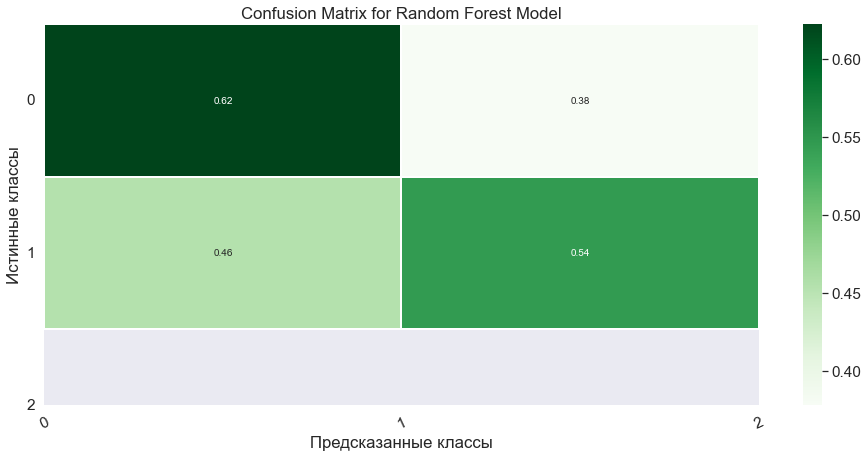

In [474]:
# так же матрица в процентах и более изящном виде
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1', '2']    
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [461]:

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.19      0.27       190
           1       0.67      0.90      0.77       352

    accuracy                           0.65       542
   macro avg       0.59      0.54      0.52       542
weighted avg       0.61      0.65      0.60       542

